In [1]:
import os

import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles

from Untitled import time_steps

In [343]:
neuro_data_path = '/run/media/nikita/e40c1d03-27f0-4c5f-b778-1710c9a842d0/data/server_sync/data/v6'
test_data = pd.read_csv(os.path.join(neuro_data_path, '0/data.csv'), index_col=0)
test_data.head()

,timestamps,k_inf,heat,Zn76,Y90_m1,La147,Tm168,Pm146,Y96,Sn123_m1,...,N14,Nd140,Y91_m1,Cd109,Nb99,Nb97_m1,Cs139,Tb157,Nb94,O15
0,0.0,1.239758,0.000199,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
1,21600.0,1.237493,60.895079,4.887365e+09,1.637540e+10,1.856578e+12,0.002154,2.934979e+06,1.009293e+13,1.846659e+13,...,8.668047e+05,1.470831e-12,1.342145e+15,0.000145,2.584369e+13,3.395246e+13,1.628974e+15,32847.159211,1.594874e+09,0.000000e+00
2,43200.0,1.232298,62.409700,4.885294e+09,2.081189e+10,1.858224e+12,0.015720,5.887099e+06,1.009476e+13,1.852333e+13,...,3.476532e+06,1.443680e-08,2.497974e+15,0.157184,2.584457e+13,6.051132e+13,1.628845e+15,65697.239362,3.205315e+09,1.658438e+07
3,64800.0,1.238025,63.237912,4.880762e+09,2.199428e+10,1.861790e+12,0.064360,8.895958e+06,1.009873e+13,1.856636e+13,...,7.848615e+06,1.371855e-08,3.249642e+15,0.168197,2.584650e+13,8.122621e+13,1.628563e+15,98535.528219,4.813631e+09,3.576378e-40
4,86400.0,1.232676,63.724331,4.884902e+09,2.233588e+10,1.858529e+12,0.167182,1.199876e+07,1.009510e+13,1.852721e+13,...,1.398478e+07,1.303691e-08,3.738148e+15,0.193054,2.584475e+13,9.739028e+13,1.628821e+15,131440.786919,6.423987e+09,7.712366e-87


<Axes: >

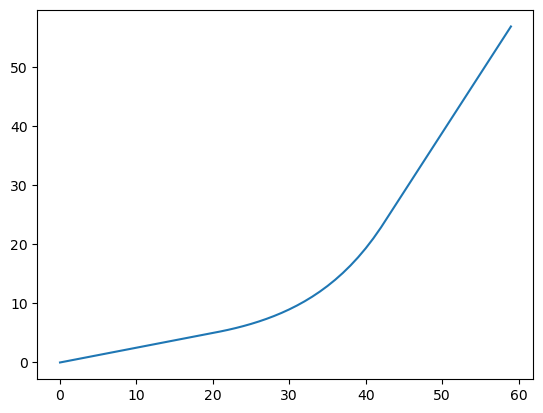

In [344]:
(test_data.head(60).timestamps/3600/24).plot()

Text(0, 0.5, 'Шаг по времени, ч')

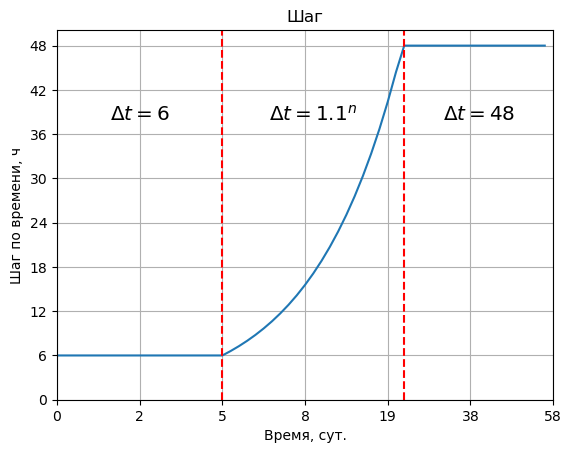

In [345]:
steps = test_data.timestamps.values[1:]-test_data.timestamps.values[:-1]

break1 = np.where(steps//3600 == 6)[0][-1]-1
break2 = np.where(steps//3600 == 48)[0][0]-1

times = test_data.timestamps.values/3600/24
num=60
ax = plt.subplot()
ax.set_xlim(0, num)
ax.plot(steps[:num]/3600)


xticks = ax.get_xticks()
xlabels = [int(times[int(tick)]) for tick in xticks]
ax.set_xticks(xticks, labels=xlabels)

ax.axvline(break1, color='r', linestyle='--')
ax.text(break1//2, 40, '$\Delta t = 6$', size='x-large', horizontalalignment='center', verticalalignment='top')
ax.axvline(break2, color='r', linestyle='--')
ax.text((break1 + break2)//2, 40, '$\Delta t = 1.1^n$', size='x-large', horizontalalignment='center', verticalalignment='top')
ax.text((xticks[-1] + break2)//2, 40, '$\Delta t = 48$', size='x-large', horizontalalignment='center', verticalalignment='top')


ax.set_yticks(range(0,50,6))
ax.grid()



ax.set_title('Шаг')
ax.set_xlabel('Время, сут.')
ax.set_ylabel('Шаг по времени, ч')

In [346]:
test_data.timestamps.values[-1]//3600/24, len(test_data.timestamps)

(np.float64(2024.8333333333333), 1044)

In [347]:
test_data.drop_duplicates()

,timestamps,k_inf,heat,Zn76,Y90_m1,La147,Tm168,Pm146,Y96,Sn123_m1,...,N14,Nd140,Y91_m1,Cd109,Nb99,Nb97_m1,Cs139,Tb157,Nb94,O15
0,0.000000e+00,1.239758,0.000199,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.160000e+04,1.237493,60.895079,4.887365e+09,1.637540e+10,1.856578e+12,2.153896e-03,2.934979e+06,1.009293e+13,1.846659e+13,...,8.668047e+05,1.470831e-12,1.342145e+15,1.448049e-04,2.584369e+13,3.395246e+13,1.628974e+15,3.284716e+04,1.594874e+09,0.000000e+00
2,4.320000e+04,1.232298,62.409700,4.885294e+09,2.081189e+10,1.858224e+12,1.572042e-02,5.887099e+06,1.009476e+13,1.852333e+13,...,3.476532e+06,1.443680e-08,2.497974e+15,1.571835e-01,2.584457e+13,6.051132e+13,1.628845e+15,6.569724e+04,3.205315e+09,1.658438e+07
3,6.480000e+04,1.238025,63.237912,4.880762e+09,2.199428e+10,1.861790e+12,6.435993e-02,8.895958e+06,1.009873e+13,1.856636e+13,...,7.848615e+06,1.371855e-08,3.249642e+15,1.681970e-01,2.584650e+13,8.122621e+13,1.628563e+15,9.853553e+04,4.813631e+09,3.576378e-40
4,8.640000e+04,1.232676,63.724331,4.884902e+09,2.233588e+10,1.858529e+12,1.671818e-01,1.199876e+07,1.009510e+13,1.852721e+13,...,1.398478e+07,1.303691e-08,3.738148e+15,1.930541e-01,2.584475e+13,9.739028e+13,1.628821e+15,1.314408e+05,6.423987e+09,7.712366e-87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1.742559e+08,1.220117,69.056842,4.805854e+09,3.790580e+10,1.849933e+12,3.214983e+06,2.889206e+13,9.973101e+12,1.909099e+13,...,5.750380e+13,5.224364e+03,4.566577e+15,9.210118e+08,2.578879e+13,1.541926e+14,1.621029e+15,6.176189e+09,2.787226e+13,5.019077e+05
1040,1.744287e+08,1.215762,69.059719,4.805627e+09,3.789934e+10,1.849667e+12,3.222192e+06,2.893786e+13,9.972165e+12,1.909150e+13,...,5.761815e+13,3.462428e+03,4.566274e+15,9.236245e+08,2.578836e+13,1.541901e+14,1.621002e+15,6.187927e+09,2.791198e+13,3.662019e-43
1041,1.746015e+08,1.218652,69.030880,4.808424e+09,3.787985e+10,1.848247e+12,3.222704e+06,2.897345e+13,9.971712e+12,1.906780e+13,...,5.773261e+13,2.294712e+03,4.567891e+15,9.261745e+08,2.578809e+13,1.542029e+14,1.621199e+15,6.199547e+09,2.795102e+13,2.671882e-91
1042,1.747743e+08,1.214187,69.042736,4.810752e+09,3.778970e+10,1.846713e+12,3.224205e+06,2.901009e+13,9.970649e+12,1.904523e+13,...,5.784718e+13,1.624835e+04,4.569299e+15,9.311025e+08,2.578756e+13,1.542118e+14,1.621369e+15,6.212834e+09,2.799000e+13,4.695410e+07


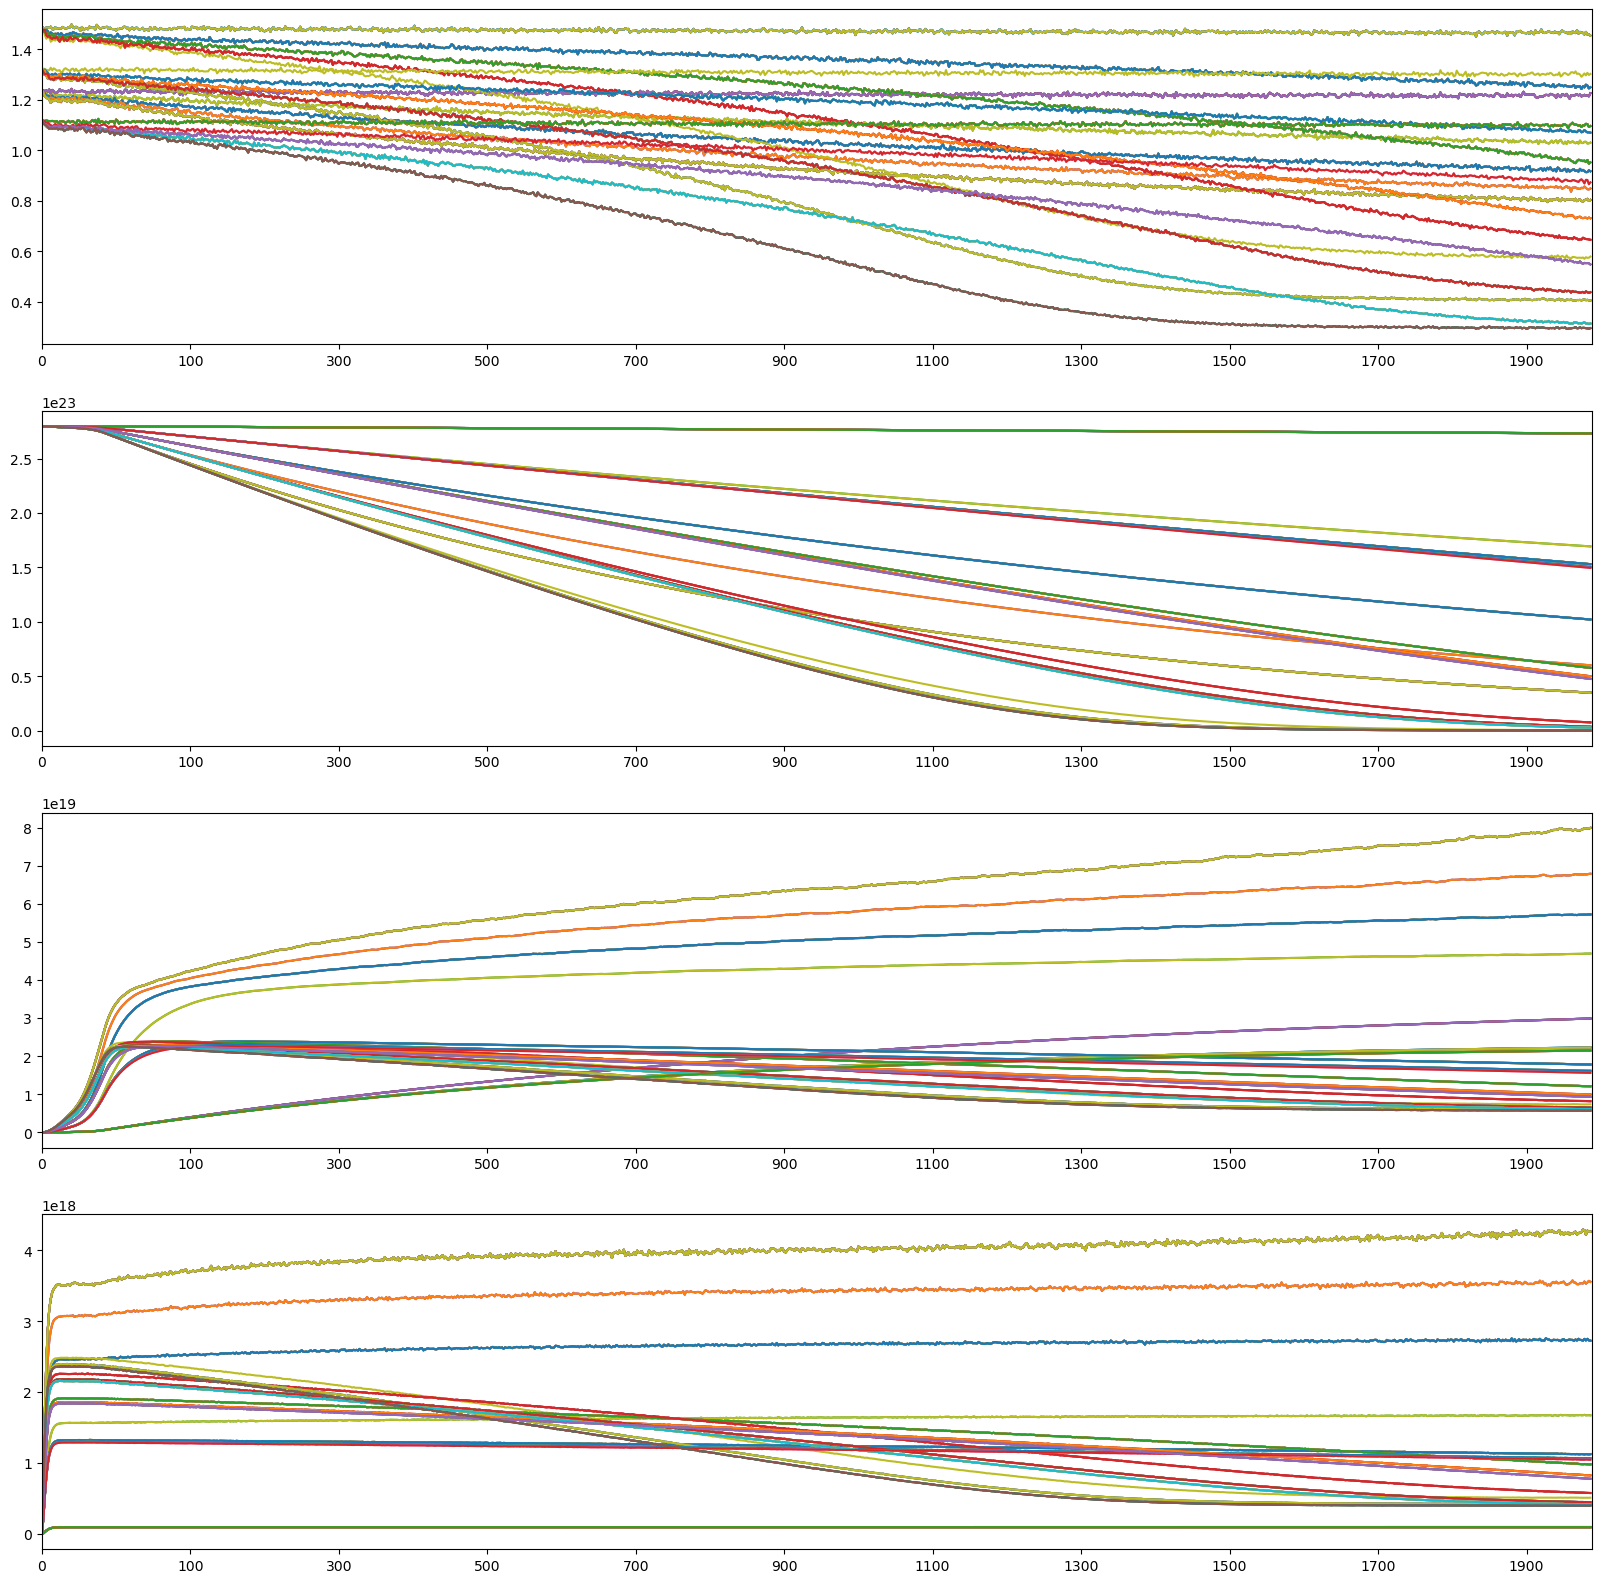

In [359]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
for i in range(len(os.listdir(neuro_data_path))):
    df_path = os.listdir(neuro_data_path)[i]
    df_path = os.path.join(neuro_data_path, df_path)
    if not os.path.isdir(df_path):
        continue
    df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
    ax[0].plot(df['k_inf'])
    ax[1].plot(df['U235'])
    ax[2].plot(df['Sm149'])
    ax[3].plot(df['Xe135'])
time_steps = df['timestamps']//3600//24
for _ax in ax:
    xticks = range(0,len(time_steps), 100)
    _ax.set_xticks(xticks, labels=[int(time_steps[i]//100*100) for i in xticks])
    _ax.set_xlim(0, len(time_steps))

In [42]:
from tqdm import tqdm
pitches_list = list(np.arange(1.0, 3.0, 0.5))
cts = []
for pth in tqdm(os.listdir(neuro_data_path), leave=False):
    dir_path = os.path.join(neuro_data_path, pth)
    if not os.path.isdir(dir_path):
        continue
    cts_path = os.path.join(dir_path, 'context.json')
    df = pd.read_csv(os.path.join(dir_path, 'data.csv'), index_col=0)
    k_end = df.tail(1).k_inf.values[0]

    ctxt = json.load(open(cts_path, 'r')) | {'id':pth, 'kend':k_end}
    cts.append(ctxt)
cts = pd.DataFrame(cts, dtype=float)
pitches = cts.water_volume
for i, p in enumerate(pitches_list):
    pitches = pitches.replace(cts.water_volume.unique()[i],p)
cts['pitch']=pitches.values

cts1 = cts.copy()
uniques = cts1.drop(['id', 'kend'], axis=1).drop_duplicates().index
cts = cts1.loc[uniques]
cts

,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
0,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,0.0,1.226503,1.0
1,3.5,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,1.0,1.226503,1.0
2,4.0,21000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,6.0,1.030816,1.0
3,4.0,41000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,10.0,0.917245,1.0
4,3.5,61000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,13.0,0.849108,1.0
5,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,16.0,0.803519,1.0
6,3.5,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,17.0,0.803519,1.0
7,4.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,18.0,0.803519,1.0
8,4.5,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,19.0,0.803519,1.0
10,4.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,22.0,1.226503,1.0


In [52]:
for ind in ['enr', 'power', 'pitch']:
    print(ind, len(cts[ind].unique()))

enr 4
power 5
pitch 4


In [50]:
cts.drop(['water_volume', 'water_density', 'fuel_volume','fuel_density', 'cladding_volume', 'cladding_density', 'id'], axis=1).groupby(['enr', 'power', 'pitch']).mean()

kend
enr power   pitch          
3.0 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.5    0.548167
    61000.0 2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            1.5    0.579303
            2.0    0.405496
            2.5    0.295606
3.5 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.0    1.030816
    41000.0 1.0    0.917245
            2.5    0.548167
    61000.0 1.0    0.849108
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.5    0.295606
4.0 1000.0  1.0    1.226503
            2.0    1.302966
    21000.0 1.0    1.030816
            1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
            2.5    0.548167
    61000.0 1.5    0.645815
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
4.5 1000.0  1.5    1.455001
    21000.0 1.5    1.250061
            2.0    1.070267
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
    61000.0 1.0    0.849108
            1.5    0.645815
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
            2.5    0.295606

In [39]:
cts.water_volume.unique()

array([ 155.48716814, 1081.05181843, 2376.84232884, 4042.85869937])

Text(0, 0.5, 'Число кампаний')

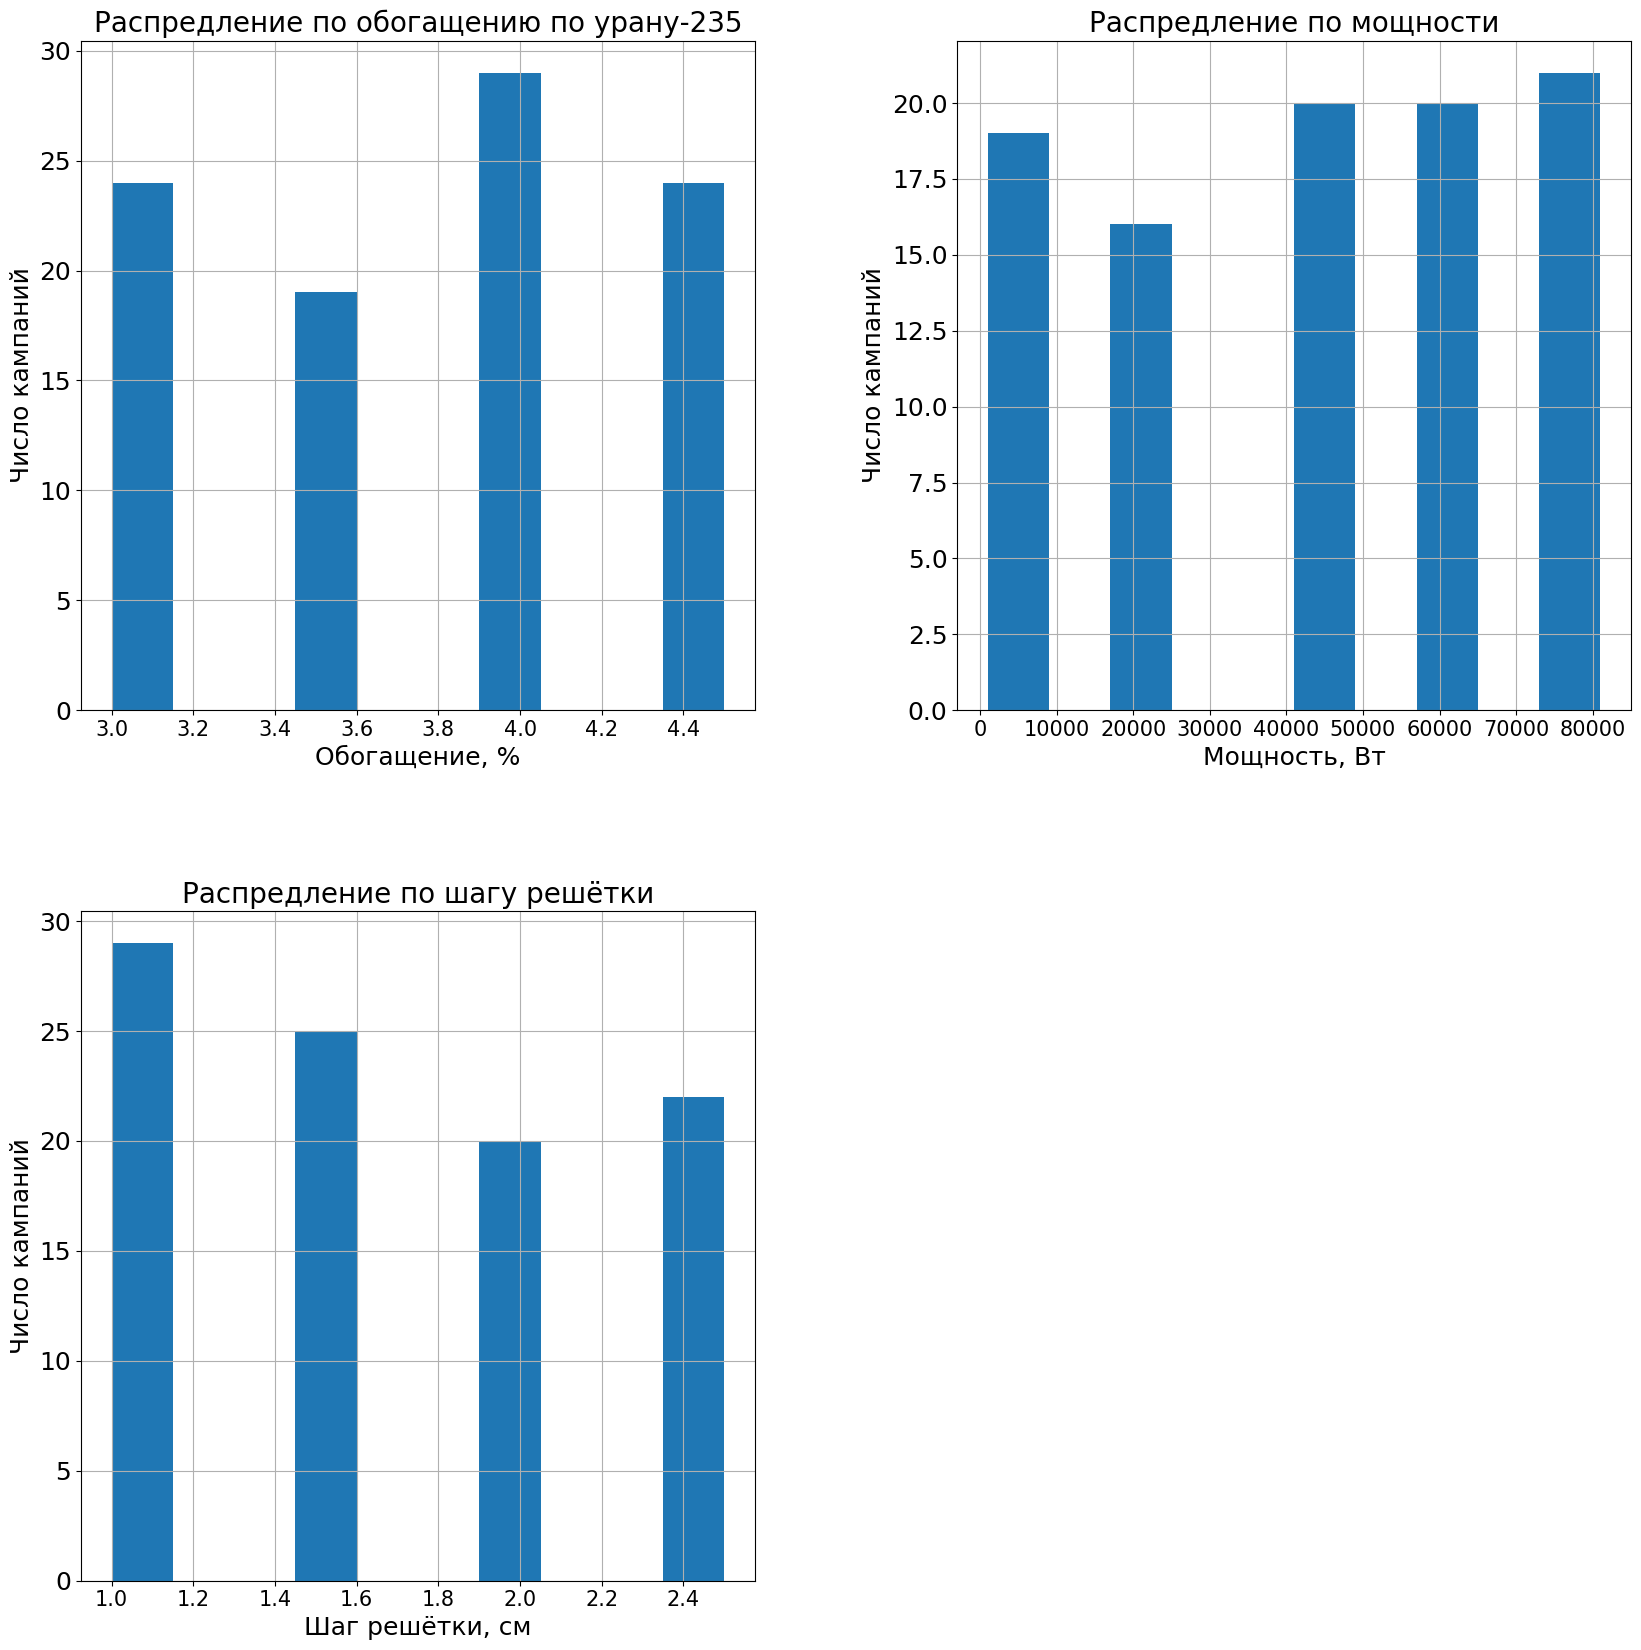

In [25]:
hists = cts1[['enr', 'power', 'pitch']].hist(figsize=(20, 20), ylabelsize=18, xlabelsize=15, )
hists[0,0].set_title('Распредление по обогащению по урану-235')
hists[0,0].title.set_fontsize(20)
hists[0,0].set_xlabel('Обогащение, %', size=18)
hists[0,0].set_ylabel('Число кампаний', size=18)


hists[0,1].set_title('Распредление по мощности')
hists[0,1].title.set_fontsize(20)
hists[0,1].set_xlabel('Мощность, Вт', size=18)
hists[0,1].set_ylabel('Число кампаний', size=18)


hists[1,0].set_title('Распредление по шагу решётки')
hists[1,0].title.set_fontsize(20)
hists[1,0].set_xlabel('Шаг решётки, см', size=18)
hists[1,0].set_ylabel('Число кампаний', size=18)




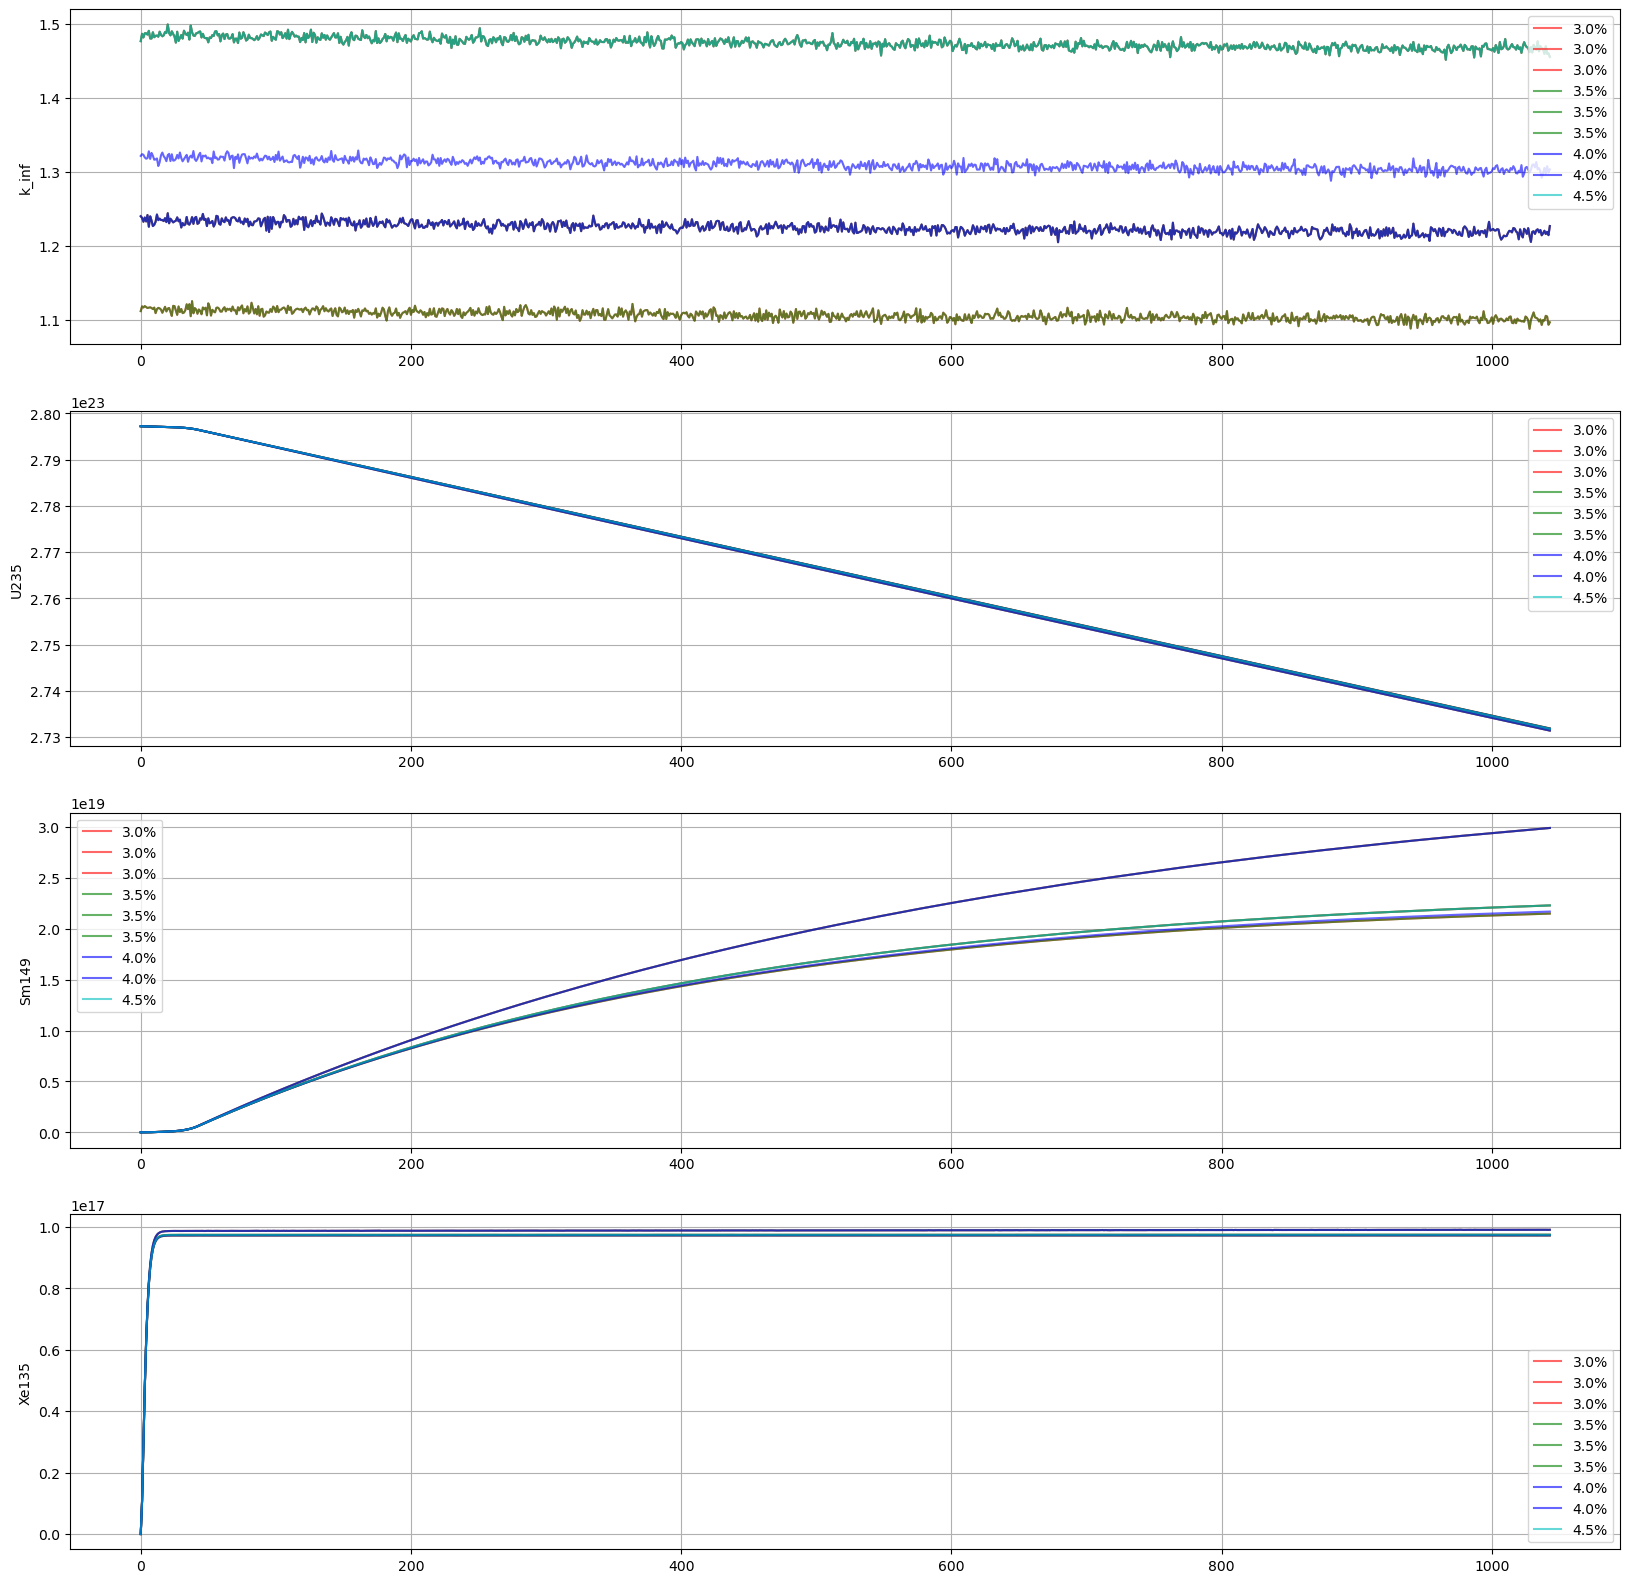

In [64]:
low_power = cts[cts['power']==1000]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']
colors = ['r', 'g', 'b', 'c', 'm']
for enr, c in zip(low_power.enr.unique(), colors):
    ids = low_power.loc[low_power.enr.isin([enr]), 'id']
    # _id = ids.values[0]
    for _id in ids.values:
        df_path = os.path.join(neuro_data_path, _id)
        if not os.path.isdir(df_path):
            continue
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        for ax_, iso in zip(ax, isos):
            ax_.plot(df[iso], label=f"{enr}%", alpha=0.6, color=c)
            ax_.legend()
            ax_.grid(True)
            ax_.set_ylabel(f"{iso}")




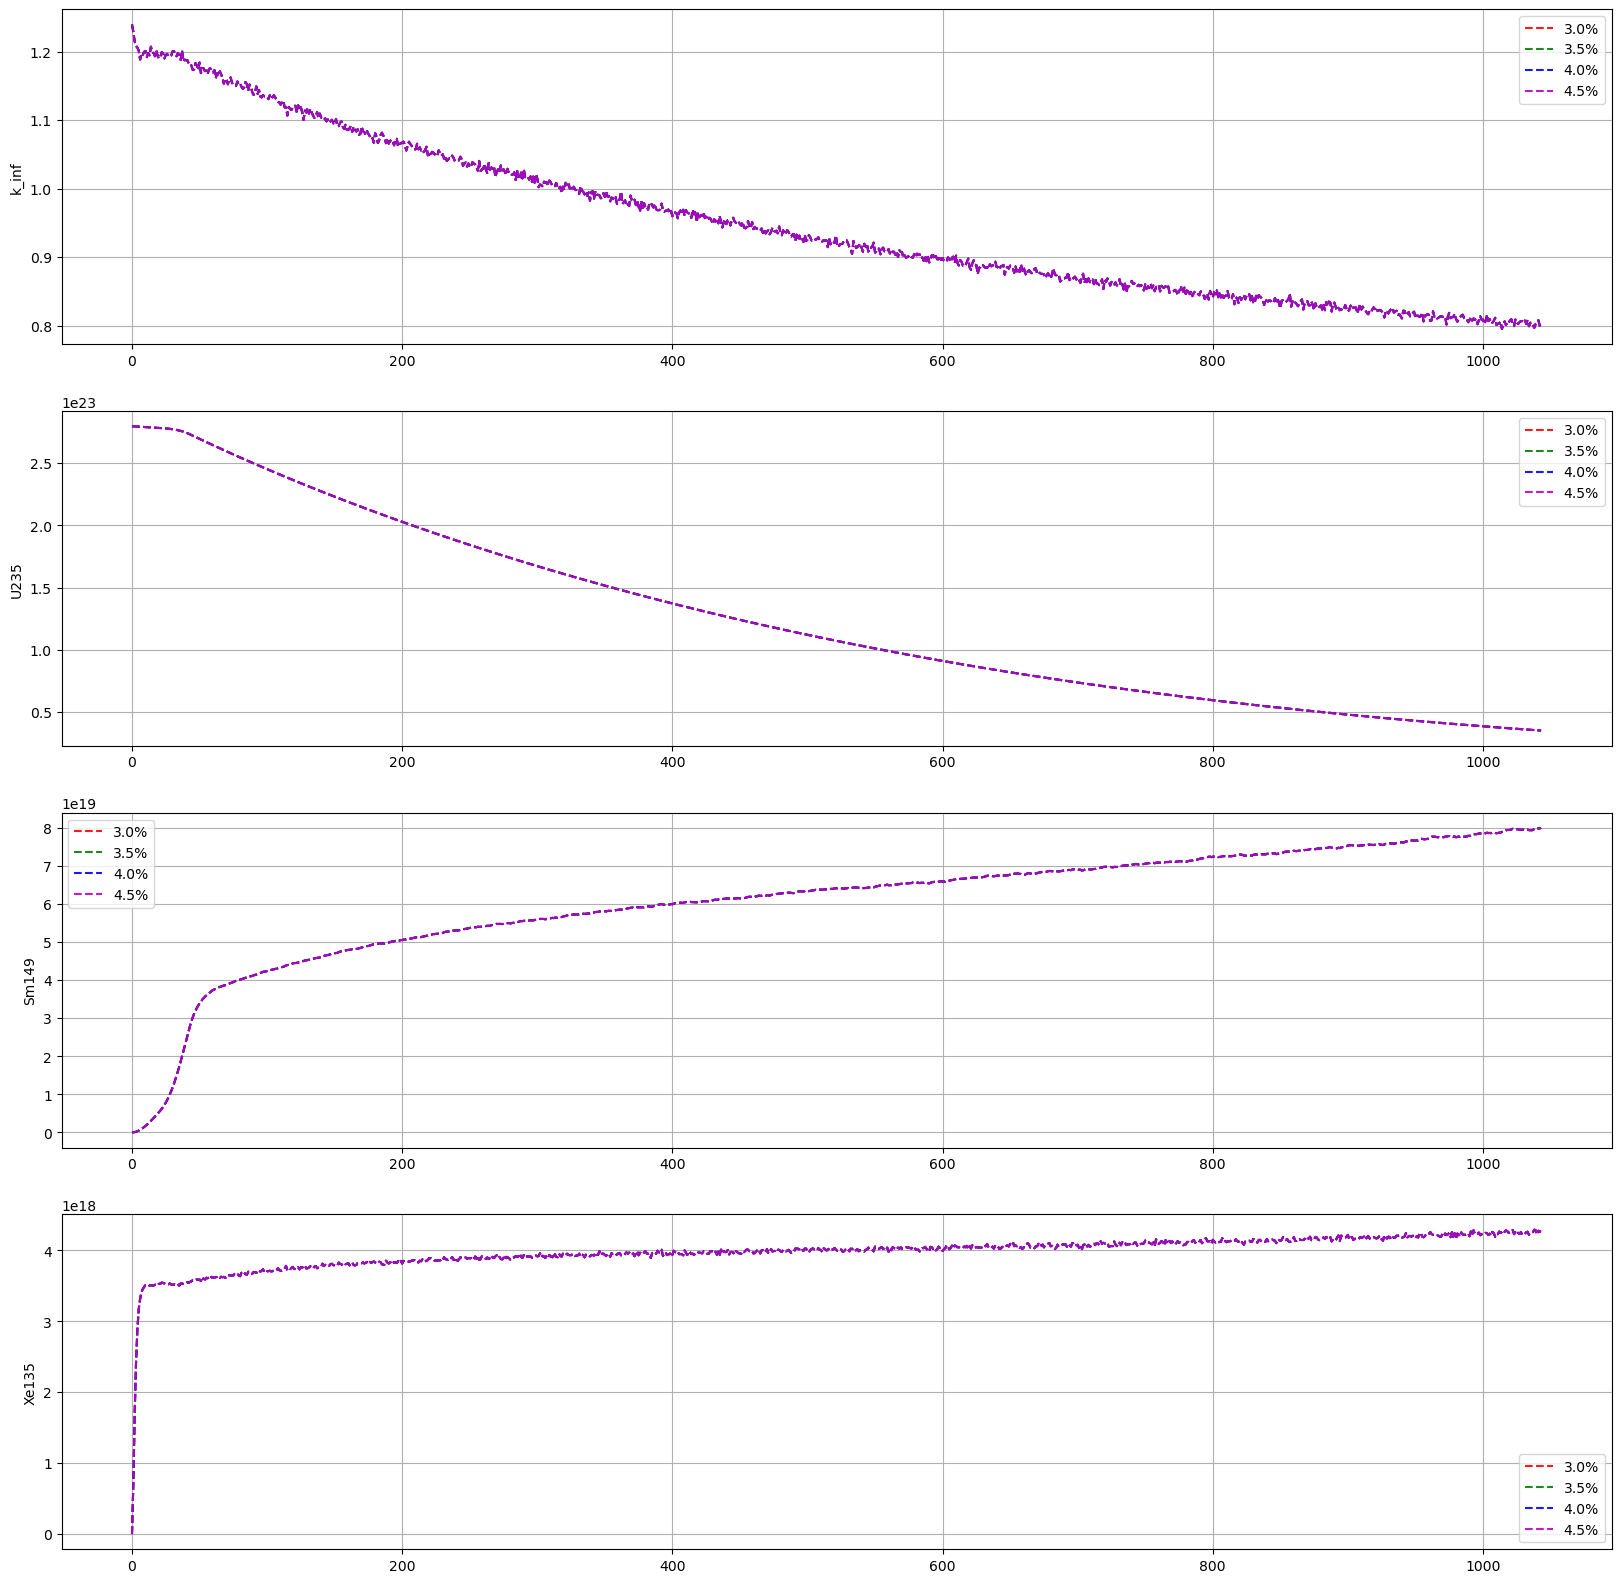

In [65]:
high_power = cts[cts['power']==81000]
high_power = high_power.loc[high_power.water_volume.isin([155.4871681372756])]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']
colors = ['r', 'g', 'b', 'm', 'c']
lines = {x:{} for x in isos}
for enr, c in zip(high_power.enr.unique(), colors):
    ids = high_power.loc[high_power.enr.isin([enr]), 'id']
    # _id = ids.values[0]
    for _id in ids.values:
        df_path = os.path.join(neuro_data_path, _id)
        if not os.path.isdir(df_path):
            continue
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        for ax_, iso in zip(ax, isos):
            line, = ax_.plot(df[iso], alpha=0.9, color=c, linestyle='--')
            if lines[iso].get(str(enr), None) is None:
                lines[iso][str(enr)] = line
                line.set_label(f"{enr}%")
            # ax_.legend()
            ax_.grid(True)
            ax_.set_ylabel(f"{iso}")
for _ax in ax:
    _ax.legend()


In [66]:
high_enr = cts[cts['enr']==4.5].sort_values('power', ascending=True, inplace=False)
for ww in high_enr.water_volume.unique():
    print(ww)
    enrs = high_enr.loc[high_enr.water_volume == ww, 'power'].unique()
    print(enrs)

1081.0518184318946
[ 1000 21000 41000 61000]
2376.8423288443605
[21000 41000 61000 81000]
155.4871681372756
[41000 61000 81000]
4042.858699374674
[61000 81000]


In [422]:
low_enr

,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
74,3.0,1000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,240.0,1.096437,2.5
93,3.0,21000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,304.0,0.873331,2.5
94,3.0,41000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,308.0,0.548167,2.5
77,3.0,61000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,252.0,0.313969,2.5
80,3.0,81000.0,4042.858699,1.0,298.451302,8.3,537.212344,6.56,256.0,0.295606,2.5


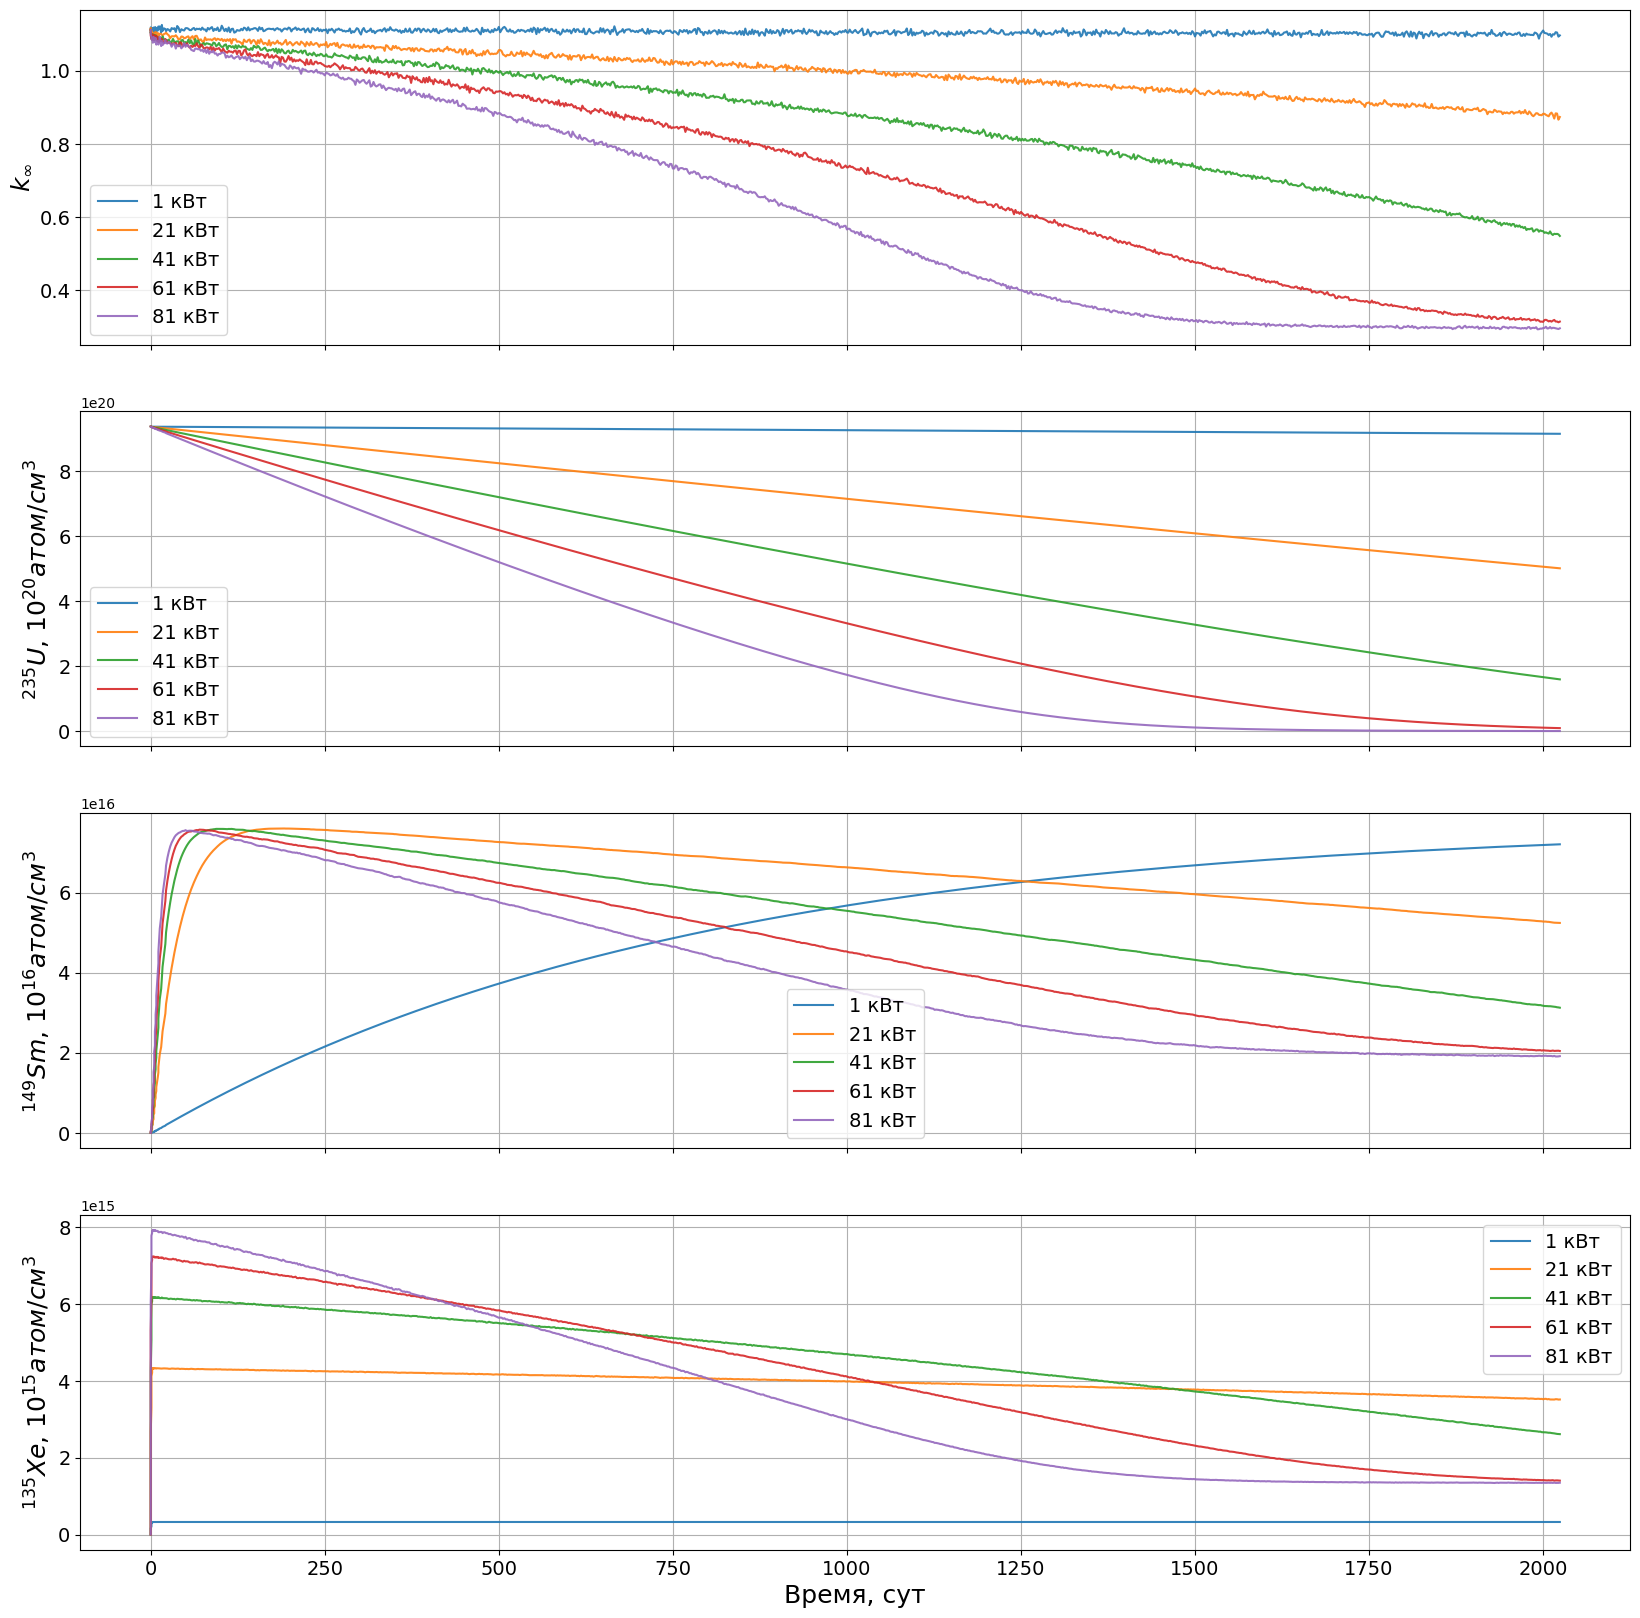

In [420]:
low_enr = cts[cts['enr']==3.0].sort_values('power', ascending=True, inplace=False)
low_enr = low_enr[low_enr.water_volume==4042.858699374674]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20), sharex=True, sharey=False)
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']

for power in low_enr.power.unique():
    ids = low_enr.loc[low_enr.power.isin([power]), 'id']
    # _id = ids.values[0]
    for _id in ids.values:
        df_path = os.path.join(neuro_data_path, f"{int(_id)}")
        if not os.path.isdir(df_path):
            continue
        fv = low_enr.loc[low_enr.id == _id, 'fuel_volume'].values[0]
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        time_steps = df['timestamps']//3600//24
        xticks = range(0,len(time_steps), 100)
        for ax_, iso in zip(ax, isos):
            data = df[iso]
            ylbl = "$k_{\infty}$"
            if iso != 'k_inf':
                data/=fv
                let, num = iso[:-3], iso[-3:]
                ylbl = f"$^{{{num}}}{let}$, "

                _pow=1
                if iso == 'U235':
                    _pow = 20
                elif iso == 'Sm149':
                    _pow = 16
                elif iso == 'Xe135':
                    _pow = 15

                if _pow > 1:
                    ylbl+=f"$10^{{{_pow}}}$"

                ylbl += "$атом/см^3$"
            ax_.plot(time_steps,data, label=f"{power//1000:.0f} кВт", alpha=0.9)
            ax_.legend(fontsize=14)
            ax_.grid(True)
            ax_.set_ylabel(ylbl, size=18)
            ax_.axis('tight')
            ax_.tick_params(axis='both', which='major', labelsize=14)
        ax_.set_xlabel(f"Время, сут", size=18)

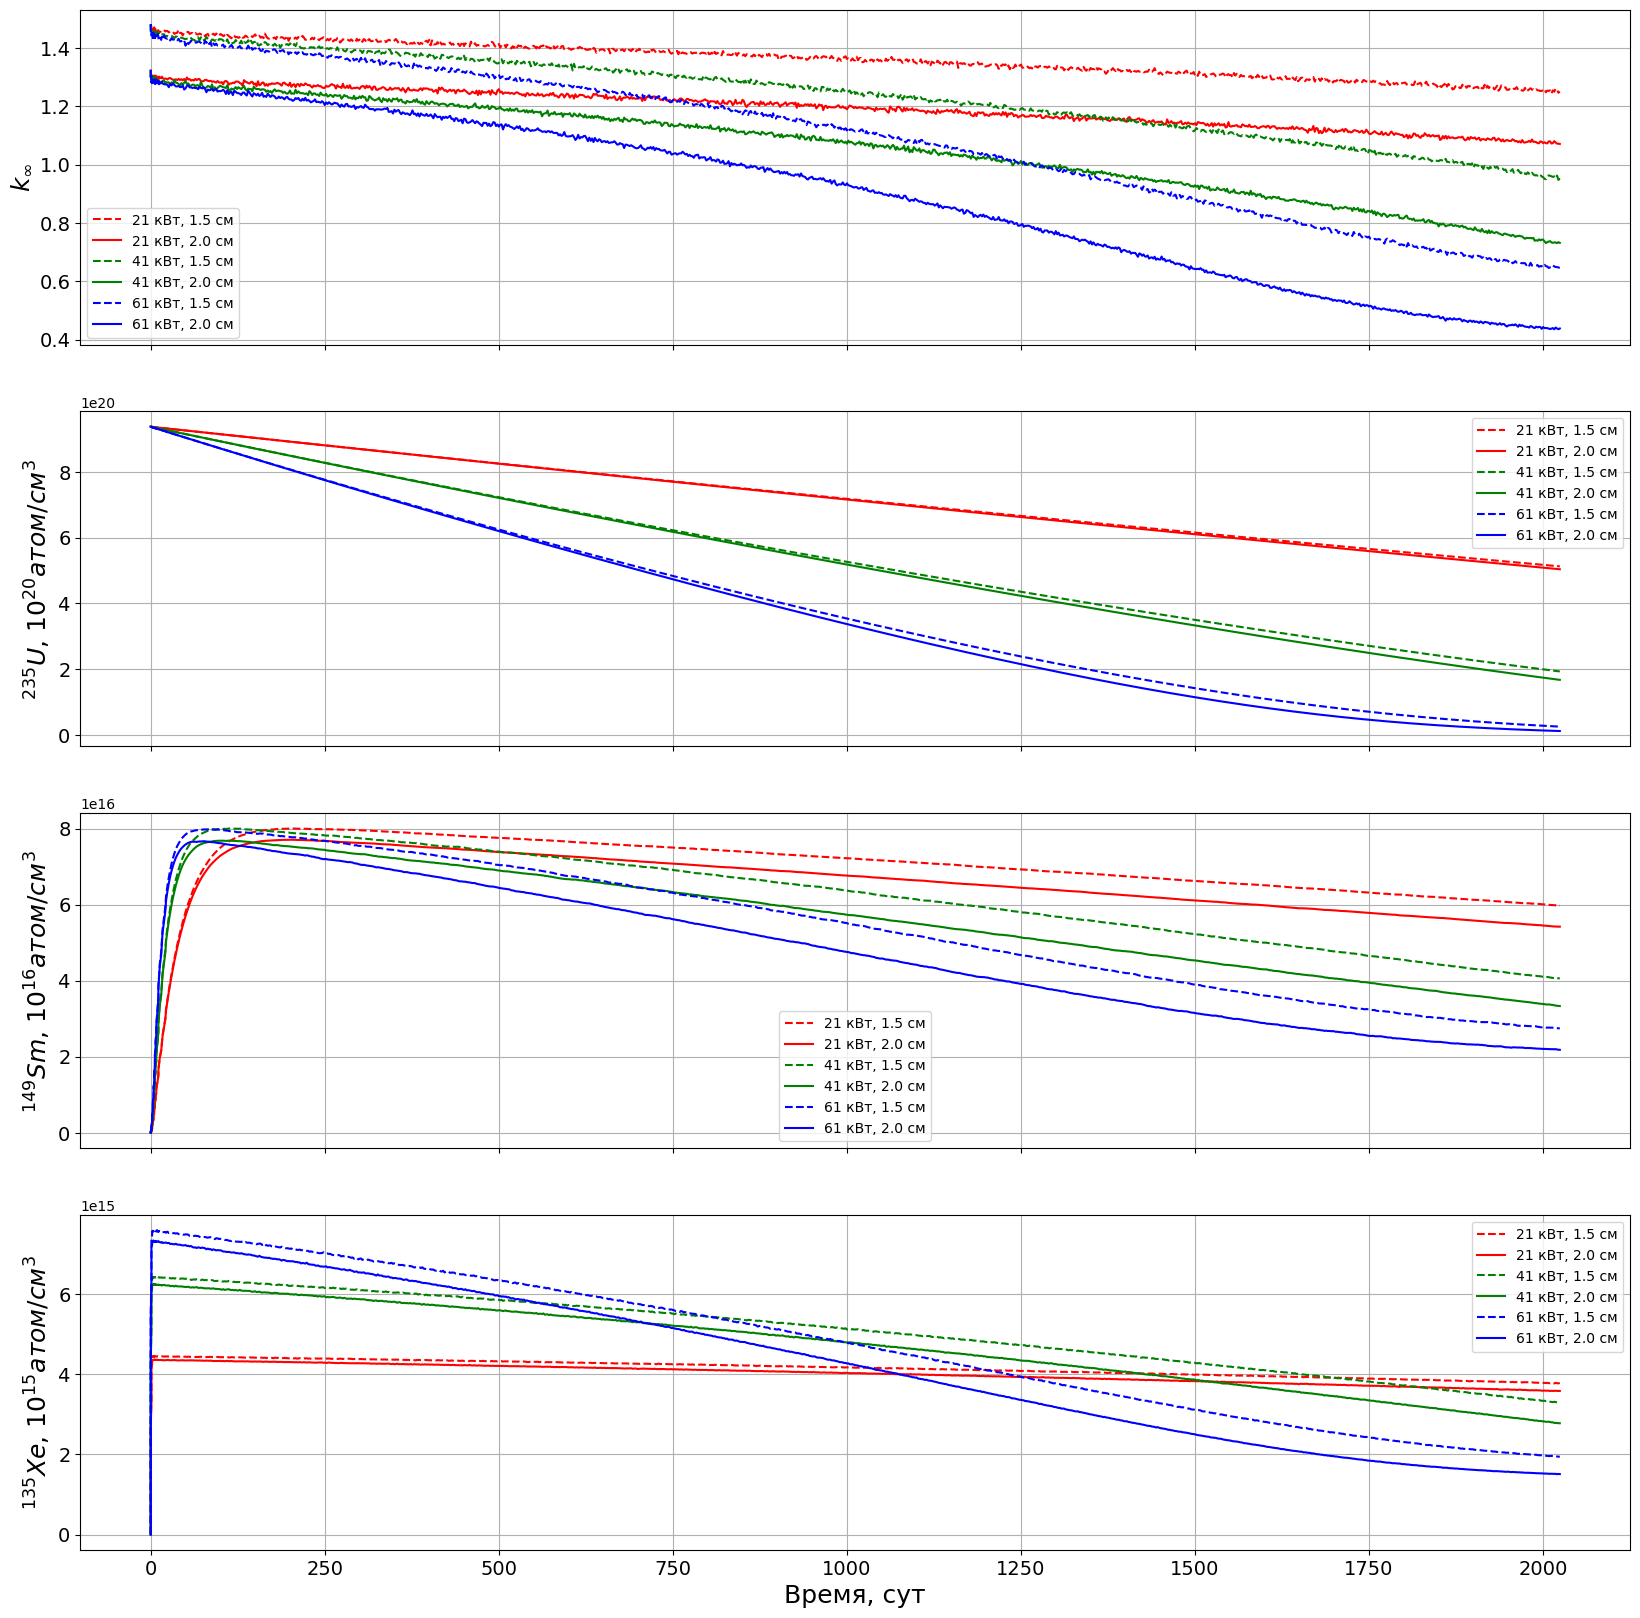

In [421]:
high_enr = cts[cts['enr']==4.5].sort_values('power', ascending=True, inplace=False)
high_enr = high_enr[high_enr.water_volume.isin([1081.0518184318946, 2376.8423288443605])]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20), sharex=True, sharey=False)
isos = ['k_inf', 'U235', 'Sm149', 'Xe135']
colors = ['r', 'g', 'b']
for power, color in zip(high_enr.power.unique()[1:-1], colors):
    ids = high_enr.loc[high_enr.power.isin([power]), 'id']
    wvs = high_enr.loc[high_enr.power.isin([power]), 'water_volume']

    # _id = ids.values[0]
    for _id, wv in zip(ids, wvs):
        df_path = os.path.join(neuro_data_path, f"{_id:.0f}")
        if wv>1500:
            linestyle = '-'
        else:
            linestyle = '--'
        if not os.path.isdir(df_path):
            continue
        df = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
        time_steps = df['timestamps']//3600//24
        fv = high_enr.loc[high_enr.id == _id, 'fuel_volume'].values[0]
        pitch = high_enr.loc[high_enr.id == _id, 'pitch'].values[0]
        for ax_, iso in zip(ax, isos):
            data = df[iso]
            ylbl = "$k_{\infty}$"
            if iso != 'k_inf':
                data/=fv
                let, num = iso[:-3], iso[-3:]
                ylbl = f"$^{{{num}}}{let}$, "

                _pow=1
                if iso == 'U235':
                    _pow = 20
                elif iso == 'Sm149':
                    _pow = 16
                elif iso == 'Xe135':
                    _pow = 15

                if _pow > 1:
                    ylbl+=f"$10^{{{_pow}}}$"

                ylbl += "$атом/см^3$"

            ax_.plot(time_steps, data, label=f"{power/1000:.0f} кВт, {pitch} см", alpha=1, c=color, linestyle=linestyle)
            ax_.legend()
            ax_.grid(True)
            ax_.set_ylabel(ylbl, size=18)
            ax_.axis('tight')
            ax_.tick_params(axis='both', which='major', labelsize=14)
        ax_.set_xlabel(f"Время, сут", size=18)

In [18]:
low_power.loc[low_power.enr.isin([3.0,4.5])]

,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id
0,3.0,1000,155.487168,1.0,298.451302,8.3,537.212344,6.56,0
23,3.0,1000,155.487168,1.0,298.451302,8.3,537.212344,6.56,60
29,3.0,1000,1081.051818,1.0,298.451302,8.3,537.212344,6.56,80
40,4.5,1000,1081.051818,1.0,298.451302,8.3,537.212344,6.56,103
44,4.5,1000,1081.051818,1.0,298.451302,8.3,537.212344,6.56,123
48,4.5,1000,1081.051818,1.0,298.451302,8.3,537.212344,6.56,143
74,3.0,1000,4042.858699,1.0,298.451302,8.3,537.212344,6.56,240
83,3.0,1000,4042.858699,1.0,298.451302,8.3,537.212344,6.56,260
91,3.0,1000,4042.858699,1.0,298.451302,8.3,537.212344,6.56,300


In [ ]:
kends = []
for _id in cts.id.unique():
    df_path = os.path.join(neuro_data_path, _id)
    if not os.path.isdir(df_path):
        continue
    data = pd.read_csv(os.path.join(df_path, 'data.csv'), index_col=0)
    kend = data.tail(1).k_inf


In [185]:
aggr = cts1.drop(['water_volume', 'water_density', 'fuel_volume','fuel_density', 'cladding_volume', 'cladding_density', 'id'], axis=1).groupby(['enr', 'power', 'pitch']).mean()
aggr

kend
enr power   pitch          
3.0 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.5    0.548167
    61000.0 2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            1.5    0.579303
            2.0    0.405496
            2.5    0.295606
3.5 1000.0  1.0    1.226503
            1.5    1.455001
            2.5    1.096437
    21000.0 1.0    1.030816
    41000.0 1.0    0.917245
            2.5    0.548167
    61000.0 1.0    0.849108
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.5    0.295606
4.0 1000.0  1.0    1.226503
            2.0    1.302966
    21000.0 1.0    1.030816
            1.5    1.250061
            2.0    1.070267
            2.5    0.873331
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
            2.5    0.548167
    61000.0 1.5    0.645815
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
4.5 1000.0  1.5    1.455001
    21000.0 1.5    1.250061
            2.0    1.070267
    41000.0 1.0    0.917245
            1.5    0.952396
            2.0    0.731356
    61000.0 1.0    0.849108
            1.5    0.645815
            2.0    0.437967
            2.5    0.313969
    81000.0 1.0    0.803519
            2.0    0.405496
            2.5    0.295606

In [224]:
aggr.loc[(enrs, powers, pitches), 'kend']

enr  power    pitch
3.0  1000.0   1.0      1.226503
              1.5      1.455001
              2.5      1.096437
     21000.0  1.5      1.250061
              2.0      1.070267
              2.5      0.873331
     41000.0  1.0      0.917245
              1.5      0.952396
              2.5      0.548167
     61000.0  2.0      0.437967
              2.5      0.313969
     81000.0  1.0      0.803519
              1.5      0.579303
              2.0      0.405496
              2.5      0.295606
3.5  1000.0   1.0      1.226503
              1.5      1.455001
              2.5      1.096437
     21000.0  1.0      1.030816
     41000.0  1.0      0.917245
              2.5      0.548167
     61000.0  1.0      0.849108
              2.0      0.437967
              2.5      0.313969
     81000.0  1.0      0.803519
              2.5      0.295606
4.0  1000.0   1.0      1.226503
              2.0      1.302966
     21000.0  1.0      1.030816
              1.5      1.250061
              2.0   

In [222]:
powers = cts1.power.unique()
enrs = cts1.enr.unique()
pitches = cts1.pitch.unique()
power_enr = np.zeros((len(powers), len(enrs)))
power_pitch = np.zeros((len(powers), len(pitches)))
enr_pitch = np.zeros((len(enrs), len(pitches)))

In [248]:
pitches, powers, enrs

(array([1. , 1.5, 2. , 2.5]),
 array([ 1000., 21000., 41000., 61000., 81000.]),
 array([3. , 3.5, 4. , 4.5]))

In [239]:
from itertools import product
for enr, power, pitch in product(enrs, powers, pitches):
    # enr, power, pitch = ind
    enr, power, pitch = float(enr), float(power), float(pitch)
    try:
        k = aggr.loc[(enr, power, pitch), 'kend']
    except KeyError:
        k=np.nan
    finally:
        enr = np.where(enrs == enr)[0][0]
        power = np.where(powers == power)[0][0]
        pitch = np.where(pitches == pitch)[0][0]

        power_enr[power, enr] = k
        power_pitch[power, pitch] = k
        enr_pitch[enr, pitch] = k

In [240]:
power_enr

array([[1.09643672, 1.09643672,        nan,        nan],
       [0.87333111,        nan, 0.87333111,        nan],
       [0.54816681, 0.54816681, 0.54816681,        nan],
       [0.31396889, 0.31396889, 0.31396889, 0.31396889],
       [0.29560584, 0.29560584,        nan, 0.29560584]])

In [241]:
power_pitch

array([[       nan, 1.45500103,        nan,        nan],
       [       nan, 1.2500612 , 1.07026691,        nan],
       [0.91724466, 0.95239635, 0.73135625,        nan],
       [0.84910824, 0.64581507, 0.43796738, 0.31396889],
       [0.80351941,        nan, 0.40549552, 0.29560584]])

In [242]:
enr_pitch

array([[0.80351941, 0.57930338, 0.40549552, 0.29560584],
       [0.80351941,        nan,        nan, 0.29560584],
       [0.80351941,        nan, 0.40549552,        nan],
       [0.80351941,        nan, 0.40549552, 0.29560584]])

In [246]:
cts1[cts1.pitch==1.0][cts1.enr==3.0]

/tmp/ipykernel_1258825/3492353410.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cts1[cts1.pitch==1.0][cts1.enr==3.0]


,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
0,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,0.0,1.226503,1.0
5,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,16.0,0.803519,1.0
11,3.0,41000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,28.0,0.917245,1.0
15,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,36.0,0.803519,1.0
23,3.0,1000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,60.0,1.226503,1.0
25,3.0,81000.0,155.487168,1.0,298.451302,8.3,537.212344,6.56,76.0,0.803519,1.0


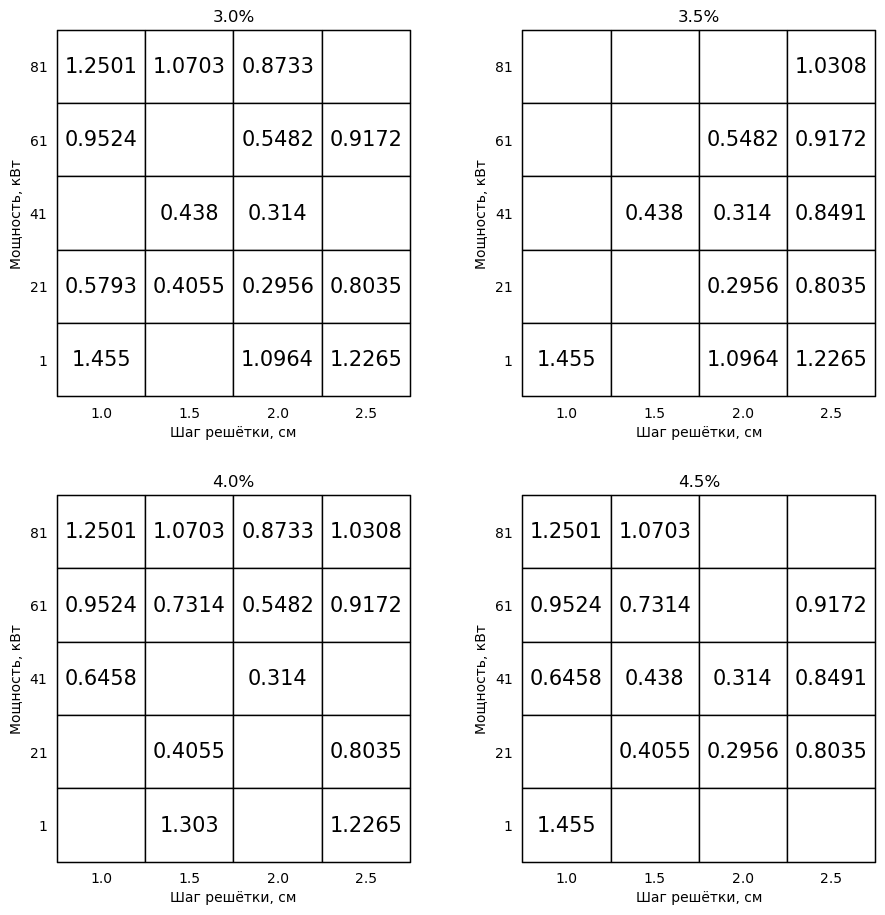

In [428]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.tight_layout(pad=5)
for n, enr in enumerate(cts1.enr.unique()):
    sub_cts = cts1.loc[cts1.enr==enr]
    sub_aggr = sub_cts.groupby(['pitch', 'power']).mean()
    mat = np.full(power_pitch.shape, np.nan)
    for pitch, power in product(pitches, powers):
        ind = float(pitch), float(power)
        try:
            k = sub_aggr.loc[ind, 'kend']
        except KeyError:
            continue
        else:
            x = np.where(pitches==pitch)[0][0]
            y = np.where(powers==power)[0][0]
            mat[y-1,x-1] = round(k,4)

    df = pd.DataFrame(mat)

    axes[n//2, n%2].set_title(f"{enr}%")
    table = axes[n//2, n%2].table(df.fillna('').values, bbox=(0, 0,1,1), rowLoc='center', cellLoc='center')
    table.set_fontsize(18)
    axes[n//2, n%2].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

    axes[n//2, n%2].set_xticks(np.arange(0.25/2, 1.1, 0.25), labels=np.arange(1, 3, 0.5))
    axes[n//2, n%2].set_xlabel(f"Шаг решётки, см")

    axes[n//2, n%2].set_yticks(np.arange(0.1, 1.1, 0.2), labels=np.arange(1, 100, 20))
    axes[n//2, n%2].set_ylabel(f"Мощность, кВт")

    # axes[n//2, n%2].grid(True)
    # for i in range(mat.shape[0]):
    #     for j in range(mat.shape[1]):
    #         if mat[i, j] >0:
    #             axes[n//2, n%2].text(j, i, f"{mat[i, j]:.3f}", horizontalalignment='center', verticalalignment='center', color='black')

In [324]:
cts.loc[cts.power==21000].loc[cts.pitch==2.0]

,enr,power,water_volume,water_density,fuel_volume,fuel_density,cladding_volume,cladding_density,id,kend,pitch
54,4.0,21000.0,2376.842329,1.0,298.451302,8.3,537.212344,6.56,166.0,1.070267,2.0
62,4.5,21000.0,2376.842329,1.0,298.451302,8.3,537.212344,6.56,207.0,1.070267,2.0
69,3.0,21000.0,2376.842329,1.0,298.451302,8.3,537.212344,6.56,224.0,1.070267,2.0


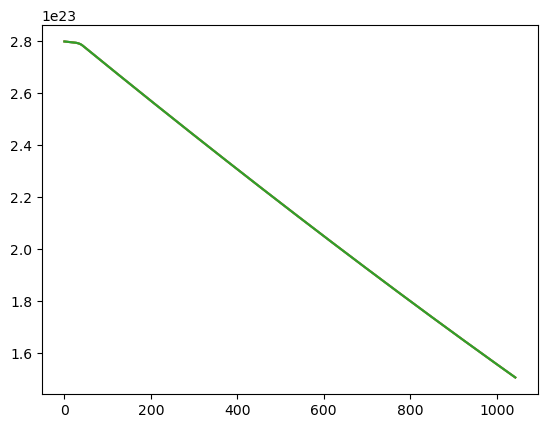

In [426]:
tails = []
for _id in cts.loc[cts.power==21000].loc[cts.pitch==2.0, 'id']:
    df1 = pd.read_csv(os.path.join(neuro_data_path, f'{int(_id)}/data.csv'), index_col=0)
    tails.append(df1['U235'].values)
tails = np.array(tails).T
plt.plot(tails)

In [342]:
cts.round(6).groupby('kend').count()['enr']

kend
0.295606    3
0.313969    4
0.405496    3
0.437967    3
0.548167    3
0.579303    1
0.645815    2
0.731356    2
0.803519    4
0.849108    2
0.873331    2
0.917245    4
0.952396    3
1.030816    2
1.070267    3
1.096437    2
1.226503    3
1.250061    3
1.302966    1
1.455001    3
Name: enr, dtype: int64

In [341]:
len(cts)

53